In [10]:
rm(list = ls())
library(SCORPIUS)
#library(SeuratData) #加载seurat数据集  
getOption('timeout')
options(timeout=10000)

[1] 10000

In [11]:
setwd('/import/DB/zhang//data')

In [12]:
library(Seurat)

In [13]:
load('forslingshot.rda')

In [14]:
expression <- t(as.matrix(sce@assays$RNA@scale.data))
group_name =  as.factor(as.character(sce$celltype))
table(group_name)
dim(expression)
expression[1:4,1:4]

group_name
BMSC  OBs  OS1  OS2 
1716 2909 4928 4448 

[1] 14001  2000

,AL669831.5,AL645608.1,AL645608.8,HES4
AAACGCTCAAGCAATA-1_1,-0.0396917,-0.03039953,-0.01673331,-0.6884472
AAAGGGCTCCATCAGA-1_1,-0.0396917,-0.03039953,-0.01673331,-0.6884472
AAAGTCCCACGGCACT-1_1,-0.0396917,-0.03039953,-0.01673331,-0.6884472
AACACACCATGCCGAC-1_1,-0.0396917,-0.03039953,-0.01673331,-0.6884472


In [15]:
infer_trajectory

function (space, k = 4, thresh = 0.001, maxit = 10, stretch = 0, 
    smoother = "smooth_spline", approx_points = 100) 
{
    check_numeric_matrix(space, "space", finite = TRUE)
    init_traj <- if (k <= 1) {
        NULL
    }
    else {
        infer_initial_trajectory(space, k = k)
    }
    fit <- princurve::principal_curve(as.matrix(space), start = init_traj, 
        thresh = thresh, maxit = maxit, stretch = stretch, smoother = smoother, 
        approx_points = approx_points, trace = FALSE, plot_iterations = FALSE)
    path <- fit$s[fit$ord, , drop = FALSE]
    dimnames(path) <- list(NULL, paste0("Comp", seq_len(ncol(path))))
    time <- dynutils::scale_minmax(fit$lambda)
    list(path = path, time = time) %>% dynutils::add_class("SCORPIUS::trajectory")
}
<bytecode: 0x55d8eb4a3820>
<environment: namespace:SCORPIUS>

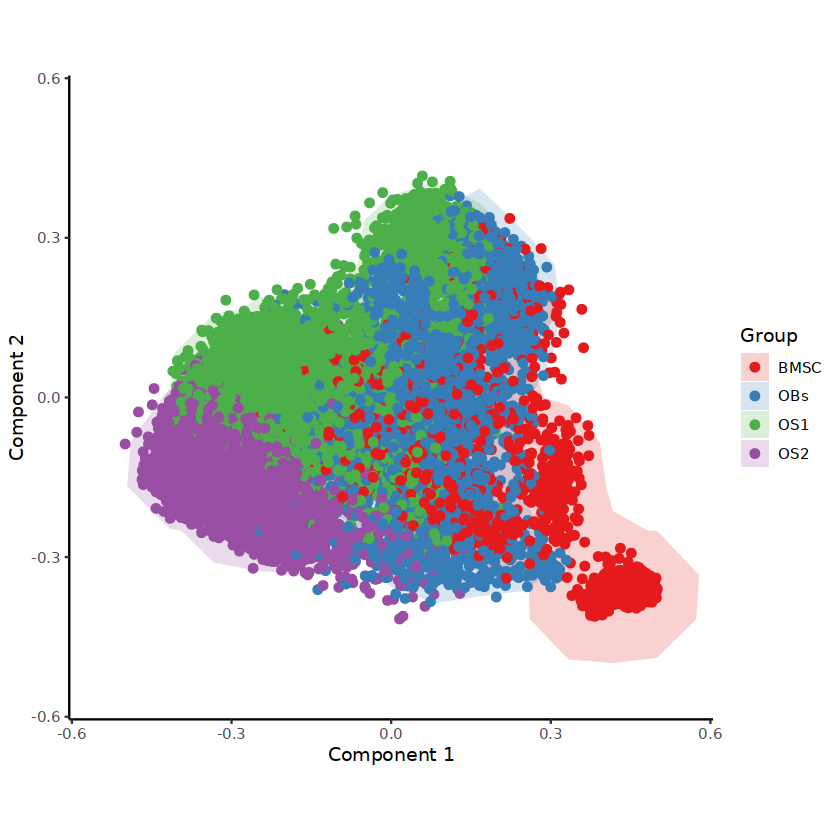

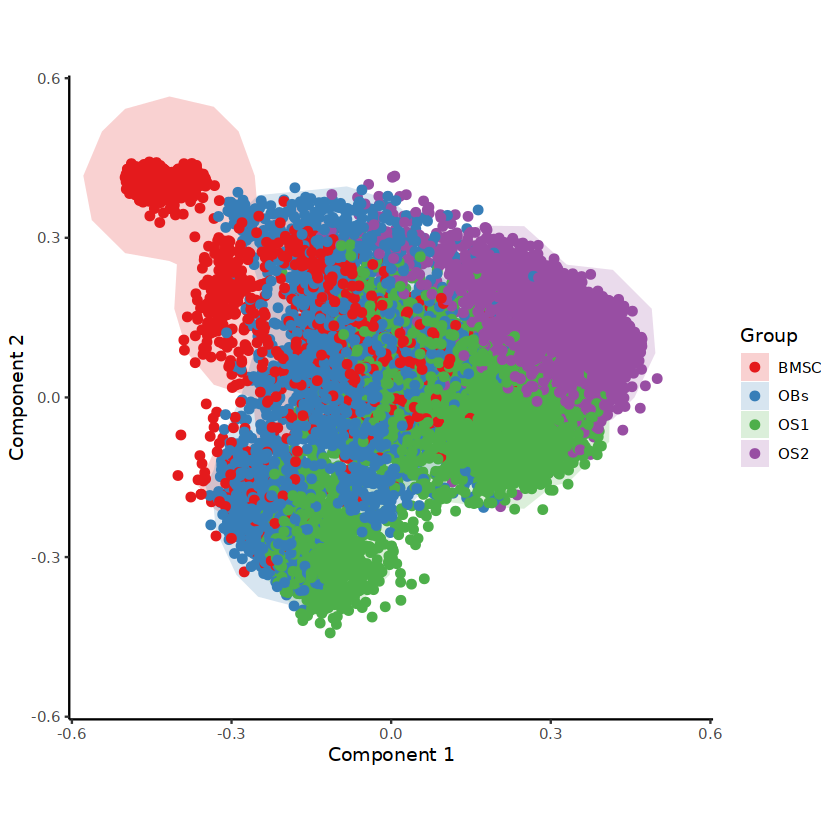

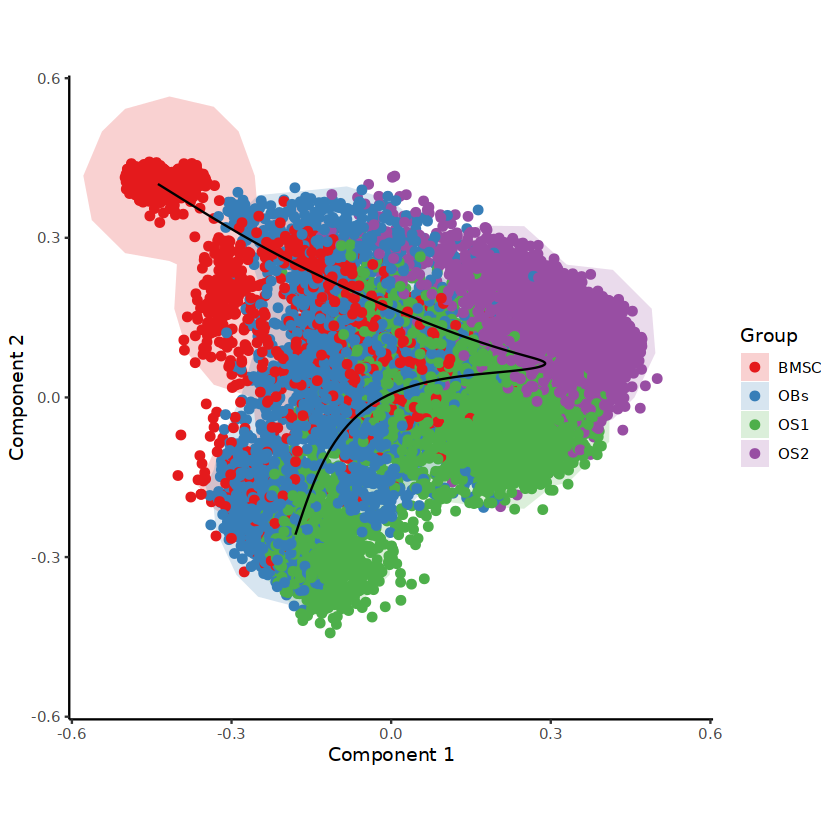

In [16]:
space <- reduce_dimensionality(expression, "spearman")
draw_trajectory_plot(space, group_name, contour = TRUE,)
space <- reduce_dimensionality(expression, "spearman")
draw_trajectory_plot(space, group_name, contour = TRUE)
traj <- infer_trajectory(space)
draw_trajectory_plot(space, group_name, traj$path, contour = TRUE)

In [7]:
gimp <- gene_importances(
  expression, 
  traj$time, 
  num_permutations = 10, 
  num_threads = 18, 
  ntree = 10000,
  ntree_perm = 1000
) 
gimp$qvalue <- p.adjust(gimp$pvalue, "BH", length(gimp$pvalue))
gene_sel <- gimp$gene[gimp$qvalue < .05]
expr_sel <- scale_quantile(expression[,gene_sel])

Growing trees.. Progress: 10%. Estimated remaining time: 4 minutes, 49 seconds.
Growing trees.. Progress: 19%. Estimated remaining time: 4 minutes, 16 seconds.
Growing trees.. Progress: 29%. Estimated remaining time: 3 minutes, 46 seconds.
Growing trees.. Progress: 39%. Estimated remaining time: 3 minutes, 13 seconds.
Growing trees.. Progress: 49%. Estimated remaining time: 2 minutes, 41 seconds.
Growing trees.. Progress: 59%. Estimated remaining time: 2 minutes, 11 seconds.
Growing trees.. Progress: 68%. Estimated remaining time: 1 minute, 40 seconds.
Growing trees.. Progress: 78%. Estimated remaining time: 1 minute, 8 seconds.
Growing trees.. Progress: 88%. Estimated remaining time: 36 seconds.
Growing trees.. Progress: 98%. Estimated remaining time: 5 seconds.
Growing trees.. Progress: 76%. Estimated remaining time: 10 seconds.
Growing trees.. Progress: 75%. Estimated remaining time: 10 seconds.
Growing trees.. Progress: 74%. Estimated remaining time: 10 seconds.
Growing trees.. Pro

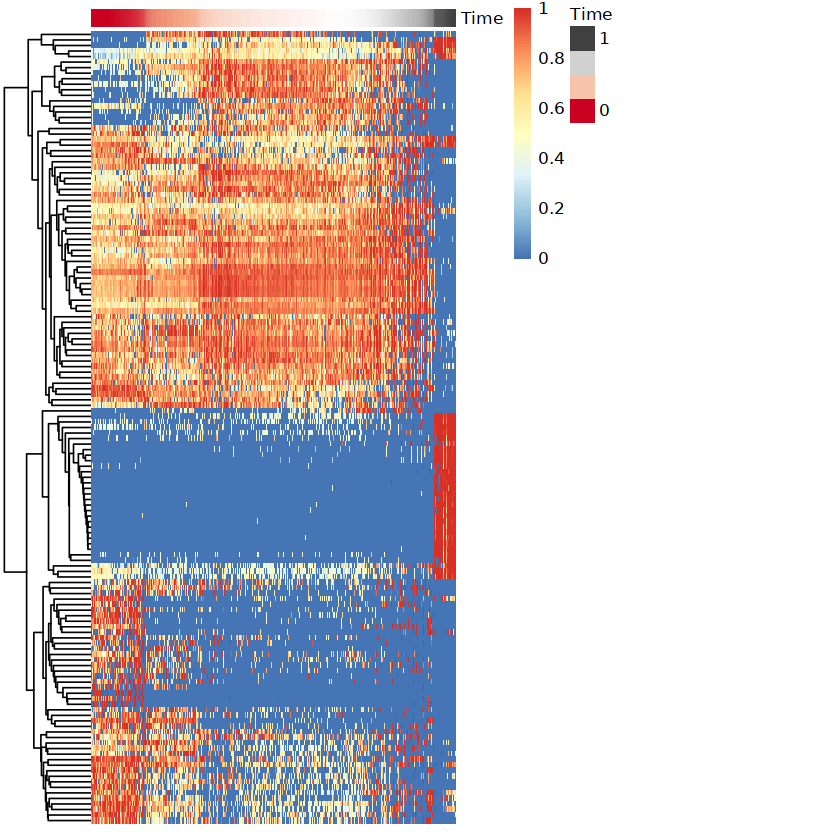

group_name
BMSC  OBs  OS1  OS2 
1716 2909 4928 4448 

ERROR: Error in names(object) <- nm: 'names' attribute [4] must be the same length as the vector [3]


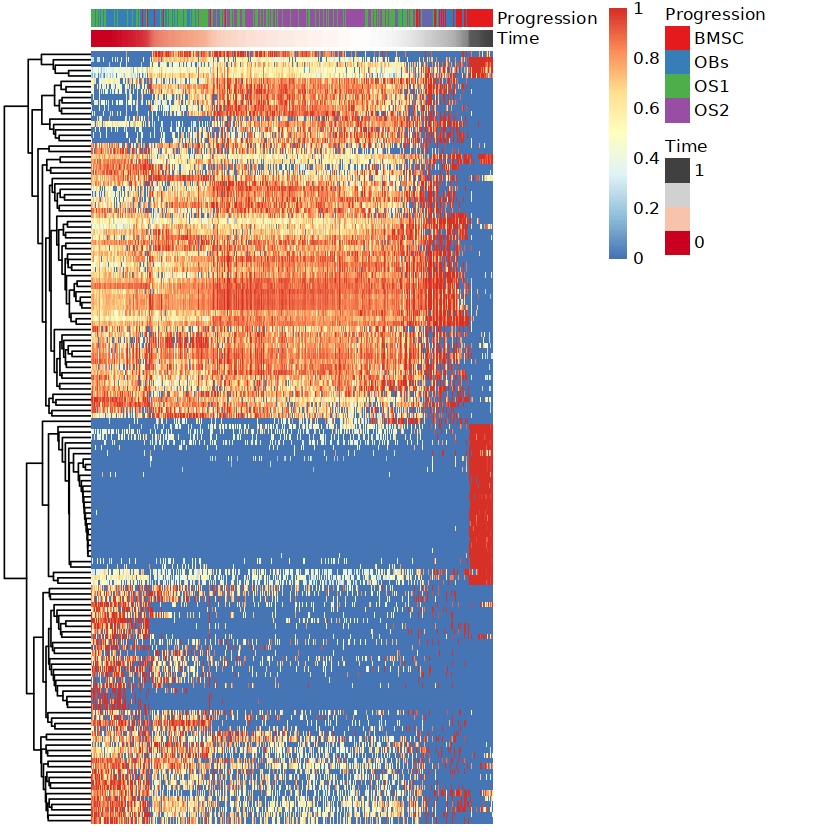

In [8]:
time <- traj$time
draw_trajectory_heatmap(expr_sel, time)

## Also show the progression groupings
draw_trajectory_heatmap(expr_sel, time, 
                        progression_group=group_name)

## 换一个配色
table(group_name)
draw_trajectory_heatmap(
  expr_sel, time, progression_group=group_name,
  progression_group_palette = setNames(RColorBrewer::brewer.pal(3, "Set2"),
                                      levels(group_name))
)

In [ ]:
modules <- extract_modules(scale_quantile(expr_sel))
draw_trajectory_heatmap(expr_sel, time,
                        progression_group=group_name, modules=modules)